# Análisis y visualización de datos

Con el objetivo de ir entendiendo la naturaleza de los datos y su modo de presentación de grafos, vamos a ir analizando los distintos tipos de nodos con sus características.

Se puede comenzar por los siguientes puntos y luego agregar otros de interés:

1- Cantidad de Personas por Edades, aqui podemos analizar la distribución de las personas de todos los equipos de trabajo, otro análisis que se puede realizar es determinar el mismo análisis pero separado por sexo.

2- Existe otro factor importante para determinar el grado de conocimiento determinado por su Seniority (organizados como Senior, Semi-senior y Junior, siendo este último el de menos experiencia), aqui podemos determinar el nivel de expertís sobre las tecnologías a analizar y con ello determinar si los equipos están altamente especializados con perfiles senior o balancean su capacidad de trabajo con perfiles de menos experiencia.
Otro factor importante a analizar es el grado de participación de las mujeres ya que de esta manera se pueden aumentar la participación de mujeres en caso de que sea muy escasa.

3- Se correlacionan las edades de las personas con los años de experiencia, que nivel de participación se observa por sexo?

4- Cuales con los conocimientos que más poseen las personas?
Teniendo en cuenta que más adelante queremos equilibrar los conocimientos que tecnologias son las dominantes? , que nivel de participación se observa por sexo?

No olvidar responder a los puntos anteriores también con las visualizaciones apropiadas.

Tip: una visualización interesante para la frecuencia de palabras es la WordCloud.

In [3]:
import pandas as pd

In [4]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...


# Generamos estadísticas descriptivas del nodo.


In [5]:
nodos.describe()

,n.age,n.experience
count,22.000000,14.000000
mean,20.681818,5.785714
std,16.980062,4.281958
min,0.000000,2.000000
25%,0.000000,3.000000
50%,26.000000,4.000000
75%,34.000000,6.750000
max,45.000000,16.000000


In [6]:
nodos.columns

Index(['n.id', 'name_node_a', 'n.type', 'n.category', 'n.gender', 'n.age',
       'n.experience'],
      dtype='object')

Analizamos los tipos de datos de cada campo inferidos por panda de los nodos

In [7]:
# En el caso de querer trabajar solo con las personas se puede aplicar lo siguiente:
#Drop Nodos que no sean personas
personas = nodos[nodos["n.type"] == "person"]

#Display html
display(personas)

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0
5,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0
6,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0
7,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0
8,822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...,Luciana,person,semi-senior,female,34.0,4.0
9,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0
18,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0
19,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0


In [8]:
dtypes = pd.DataFrame(personas.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
n.id,object
name_node_a,object
n.type,object
n.category,object
n.gender,object
n.age,float64
n.experience,float64


Analizamos los tipos de datos de cada campo inferidos por pandas de las relaciones



In [9]:
# Generamos estadísticas descriptivas de las relaciones
relaciones.describe()

,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
count,197,197,197,197,197
unique,64,64,70,69,197
top,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,db5befc893dc9fee893f4e8e41b700d4-a87ff679a2f3e...
freq,15,15,12,12,1


In [10]:
dtypes = pd.DataFrame(relaciones.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
id_node_a,object
name_node_a,object
id_node_b,object
name_node_b,object
id_relationship,object


Vamos a necesitar conocer los tipos de datos en caso de querer trabajar con el dataset de personas

In [11]:
personas.describe()

Campo,n.age,n.experience
count,14.000000,14.000000
mean,32.500000,5.785714
std,7.219099,4.281958
min,23.000000,2.000000
25%,27.000000,3.000000
50%,33.500000,4.000000
75%,35.000000,6.750000
max,45.000000,16.000000


Para visualizar la distribución de las edades

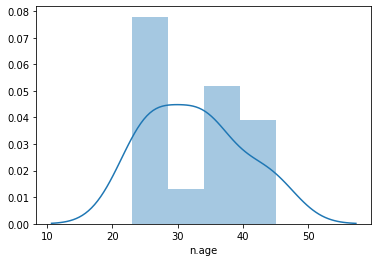

In [12]:
import seaborn as sns
sns.distplot(personas['n.age'], kde=True);


Para calcular la probabilidad de los valores posibles sexo y seniority (category), una forma más sencilla con la operación value_counts de pandas.


In [13]:
data = personas['n.gender'].value_counts(normalize=True).reset_index()
data

,index,n.gender
0,male,0.785714
1,female,0.214286


In [14]:
data = personas['n.category'].value_counts(normalize=True).reset_index()
data

,index,n.category
0,senior,0.428571
1,semi-senior,0.357143
2,junior,0.214286


Para poder trabajar con ambos dataset necesitamos hacer lo siguiente

In [15]:
resultante = nodos.merge(relaciones, left_on='n.id', right_on='id_node_a')

In [16]:
display(resultante.head())

Campo,n.id,name_node_a_x,n.type,n.category,n.gender,n.age,n.experience,id_node_a,name_node_a_y,id_node_b,name_node_b,id_relationship
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...


Si queremos trabajar con las colunmas de padre e hijo de esta primer relación

In [17]:
resultante[resultante['n.type']=='person'][['n.category','name_node_a_y','name_node_b']]

Campo,n.category,name_node_a_y,name_node_b
8,junior,Marcela,Developer
9,junior,Marcela,windows
10,junior,Marcela,Linux
11,junior,Marcela,MySQL
12,junior,Marcela,phyton
...,...,...,...
118,senior,Martin,Data Scientist
119,senior,Martin,Vertica
120,senior,Martin,SQL Server
121,senior,Martin,phyton


# Análisis exploratorio y curación de datos
En ésta entrega se comenzará a preparar el dataset para los prácticos siguientes. Algunos puntos de aquí ya han sido cubiertos en la entrega anterior para hacer el análisis. Otros pueden tener un tratamiento especial según nuestro enfoque de NLP.\

## Listado de puntos a cubrir en análisis y curación:

a. Asegurarse de tener ids/claves únicas\
b. Chequear que no haya datos duplicados\
c. No usar caracteres especiales en las etiquetas de variables\
d. Verificar que no haya problemas de codificación/encoding\
e. Verificar la consistencia de las variables\
f. Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?\
g. Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes\
h. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.\
Con los puntos anteriores ya se puede preparar los datasets que vamos a usar más adelante.\

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.\

DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).\

Por último, guarde los datasets en un formato conveniente para usar después. Importante: guardarlos en nuevos archivos para no sobreescribir los datos crudos u originales\


In [18]:
nodos_ = nodos
relaciones_ = relaciones

a.

In [19]:
nodos.shape

(92, 7)

In [20]:
relaciones.shape

(197, 5)

In [21]:
nodos.columns
nodos_col = nodos.columns

In [22]:
relaciones.columns
relaciones_col = relaciones.columns

In [23]:
pd.Series(nodos.index, dtype=str).describe()

count     92
unique    92
top       56
freq       1
dtype: object

In [24]:
nodos[nodos.index.duplicated()]

Campo,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience


In [25]:
pd.Series(relaciones.index, dtype=str).describe()

count     197
unique    197
top       121
freq        1
dtype: object

In [26]:
relaciones[relaciones.index.duplicated()]

Campo,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship


Conclusión: no hay índices/ids/claves duplicados.

b.

In [27]:
nodos[nodos.duplicated()]

Campo,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience


In [28]:
relaciones[relaciones.duplicated()]

Campo,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship


Conclusión: no hay datos duplicados.

c.

In [29]:
display(nodos.columns[~nodos.columns.str.match(r'^(\w+)$')])

Index(['n.id', 'n.type', 'n.category', 'n.gender', 'n.age', 'n.experience'], dtype='object', name='Campo')

In [30]:
nodos.columns = nodos.columns.str.replace('.', '_')
nodos.head()

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0


In [31]:
display(relaciones.columns[~relaciones.columns.str.match(r'^(\w+)$')])

Index([], dtype='object', name='Campo')

d.

In [32]:
# helpful character encoding module
import chardet
import string

In [33]:
# look at the first ten thousand bytes to guess the character encoding
with open('nodes.csv', 'rb') as rawdata_nodos:
    result = chardet.detect(rawdata_nodos.read(1000))

# check what the character encoding might be
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [34]:
# look at the first ten thousand bytes to guess the character encoding
with open('relationships.csv', 'rb') as rawdata_nodos:
    result = chardet.detect(rawdata_nodos.read(1000))

# check what the character encoding might be
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

conclusión: Usa un cifrado standard con un 100% de confianza.

In [35]:
import ftfy.badness as bad

In [36]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [37]:
for c in nodos.columns:
    name = c+'weirdness'
    nodos[name] = nodos[c].apply(weird)
    print(nodos[nodos[name] > 1].count())

Campo
n_id             0
name_node_a      0
n_type           0
n_category       0
n_gender         0
n_age            0
n_experience     0
n_idweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
n_categoryweirdness     0
dtype

In [38]:
for c in relaciones.columns:
    name = c+'weirdness'
    relaciones[name] = relaciones[c].apply(weird)
    print(relaciones[relaciones[name] > 1].count())

Campo
id_node_a             0
name_node_a           0
id_node_b             0
name_node_b           0
id_relationship       0
id_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
name_node_bweirdness    0
dtype: int64
Campo
id_node_a                   0
name_node_a                 0
id_node_b                   0
name_node_b                 0
id_relationship             0


e.

In [39]:
nodos.head()

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0,0,0,0,0,0,0,0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,0,0,0,0,0,0,0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0,0,0,0,0,0,0,0


In [40]:
nodos[(nodos.n_type == 'team') & (nodos.n_age != 0)]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [41]:
nodos[(nodos.n_type == 'person') & (nodos.n_age == 0)]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [42]:
nodos[(nodos.n_type == "person") & (nodos.n_age < nodos.n_experience)]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [43]:
relaciones.head()

Campo,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship,id_node_aweirdness,name_node_aweirdness,id_node_bweirdness,name_node_bweirdness,id_relationshipweirdness
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...,0,0,0,0,0
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...,0,0,0,0,0
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...,0,0,0,0,0
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...,0,0,0,0,0
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...,0,0,0,0,0


f.

In [44]:
import matplotlib.pyplot as plt

(array([3., 2., 1., 0., 1., 4., 0., 0., 1., 2.]),
 array([23. , 25.2, 27.4, 29.6, 31.8, 34. , 36.2, 38.4, 40.6, 42.8, 45. ]),
 <a list of 10 Patch objects>)

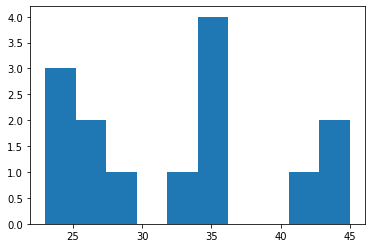

In [45]:
plt.hist(nodos[nodos.n_type=='person'].n_age.dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef7b73c048>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef7b73c748>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef7b72fcf8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef7b73ce48>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef7b747208>],
 'means': []}

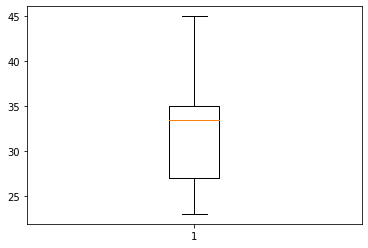

In [46]:
plt.boxplot(nodos[nodos.n_type=='person'].n_age.dropna(), whis=3)

In [47]:
outliers = nodos[nodos.n_age > (nodos.n_age.mean() + 3 * nodos.n_age.std())]
display(outliers)

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


(array([6., 2., 2., 1., 0., 0., 1., 1., 0., 1.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <a list of 10 Patch objects>)

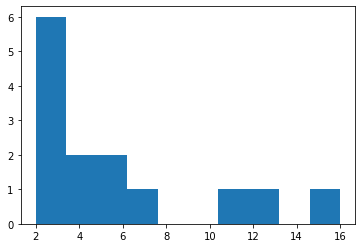

In [48]:
plt.hist(nodos[nodos.n_type=='person'].n_experience.dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef7b87f828>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef7b87ff28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef7b87f518>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef7b8f4668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef7b8f49e8>],
 'means': []}

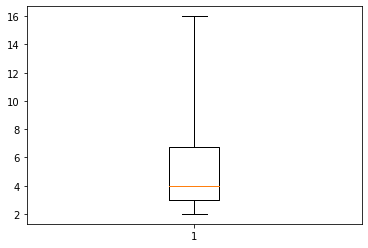

In [49]:
plt.boxplot(nodos[nodos.n_type=='person'].n_experience.dropna(), whis=3)

In [50]:
outliers = nodos[nodos.n_experience > (nodos.n_experience.mean() + 3 * nodos.n_experience.std())]
display(outliers)

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [51]:
nodos[nodos.n_experience == 16]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0,0,0,0,0,0,0,0


Outliers: todos los valores están dentro de 3 desviaciones estándares. Hay una sola persona que cae fuera de 2 DS, con 16 años de experiencia, pero hemos decidido mantener el dato dado el tamaño de la muestra analizada. Utilizamos el criterio de 3 DS a pesar de que los datos muestrales no se distribuyan normal, por convención y falta de un mejor criterio.

g.

In [52]:
nodos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_id                   92 non-null     object 
 1   name_node_a            92 non-null     object 
 2   n_type                 91 non-null     object 
 3   n_category             14 non-null     object 
 4   n_gender               14 non-null     object 
 5   n_age                  22 non-null     float64
 6   n_experience           14 non-null     float64
 7   n_idweirdness          92 non-null     int64  
 8   name_node_aweirdness   92 non-null     int64  
 9   n_typeweirdness        92 non-null     int64  
 10  n_categoryweirdness    92 non-null     int64  
 11  n_genderweirdness      92 non-null     int64  
 12  n_ageweirdness         92 non-null     int64  
 13  n_experienceweirdness  92 non-null     int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 10.2+ KB


In [53]:
datos_faltantes_nodos_cuenta = nodos.isnull().sum()
datos_faltantes_nodos_cuenta

Campo
n_id                      0
name_node_a               0
n_type                    1
n_category               78
n_gender                 78
n_age                    70
n_experience             78
n_idweirdness             0
name_node_aweirdness      0
n_typeweirdness           0
n_categoryweirdness       0
n_genderweirdness         0
n_ageweirdness            0
n_experienceweirdness     0
dtype: int64

In [54]:
nodos[(nodos.n_type == "person") & (nodos.n_category == "NaN")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [55]:
nodos[(nodos.n_type == "person") & (nodos.n_gender == "NaN")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [56]:
nodos[(nodos.n_type == "person") & (nodos.n_age == "NaN")]

/Users/agustinramellodelavega/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [57]:
nodos[(nodos.n_type == "person") & (nodos.n_experience == "NaN")]

/Users/agustinramellodelavega/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


Los campos nulos corresponden a personas.

Se destacan dos problemas: un n_type nulo, y una diferencia de 8 datos entre edad y experiencia.

In [58]:
nodos[nodos.n_type.isnull()]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
10,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,Perfiles,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [59]:
nodos[nodos['name_node_a'] == 'Perfiles'].dropna(inplace=True)

/Users/agustinramellodelavega/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
nodos = nodos[nodos['name_node_a'] != 'Perfiles']
nodos

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0,0,0,0,0,0,0,0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,0,0,0,0,0,0,0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,talend,technologies,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
88,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
89,263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...,Integracion,technologies,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
90,de1284aa9ed99ad37c8259c2028b161c-a87ff679a2f3e...,ODI,technologies,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


Perfiles corresponde a una categoría no expecificada, sobre el cual se construirá en el futuro.

In [61]:
nodos[(nodos.n_experience == "NaN") & (nodos.n_age != "NaN")]

/Users/agustinramellodelavega/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [62]:
nodos[(nodos.n_age == "0")]

/Users/agustinramellodelavega/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [63]:
nodos[nodos.n_category.isnull()].head()

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
11,ff64319904f4832ee19df96250276033-c81e728d9d4c2...,Inst DB,technologies,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
12,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
13,31985bb925fa449ee8d01350cb2f008d-a87ff679a2f3e...,AWS Kinesis,technologies,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [64]:
nodos[nodos.n_age == 0]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
24,4cd45b1d7210ec9b517bd44c201454ba-a87ff679a2f3e...,Team1,team,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
71,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
72,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
73,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...,Data Architect,skill,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
74,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0
75,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0


La diferencia está en que hay 3 "Teams" y 5 "Skills" que tienen asignada edad cero. Se la reemplazará por "NaN".

In [65]:
nodos[nodos.n_age == 0].replace(0, 'NaN')

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,4cd45b1d7210ec9b517bd44c201454ba-a87ff679a2f3e...,Team1,team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...,Data Architect,skill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


h.

In [66]:
#nodos[nodos['name_node_a']== 'busqueda_skill']

from sklearn import preprocessing

nodos.describe(include=['O'])

nodos.n_type.unique()

nodos.n_gender

relaciones.describe(include=['O'])

le = preprocessing.LabelEncoder()
le.fit(nodos['n_type'])
dict(zip(le.classes_, le.transform(le.classes_)))

nodos['n_type'] = le.transform(nodos['n_type'])

nodos['n_gender'].fillna('no_gender', inplace=True)
le = preprocessing.LabelEncoder()
le.fit(nodos['n_gender'])
dict(zip(le.classes_, le.transform(le.classes_)))

nodos['n_gender'] = le.transform(nodos['n_gender'])

nodos['n_category'].fillna('no_category', inplace=True)
le = preprocessing.LabelEncoder()
le.fit(nodos['n_category'])
dict(zip(le.classes_, le.transform(le.classes_)))

nodos['n_category'] = le.transform(nodos['n_category'])

#nodos['name_node_a'].fillna('no_name', inplace=True)
le = preprocessing.LabelEncoder()
le.fit(nodos['name_node_a'])
dict(zip(le.classes_, le.transform(le.classes_)))

nodos['name_node_a'] = le.transform(nodos['name_node_a'])

nodos = nodos.iloc[:,:7]
nodos

nodos.n_experience.fillna(0, inplace=True)
nodos.n_age.fillna(0, inplace=True)

le = preprocessing.LabelEncoder()
le.fit(relaciones['name_node_a'])
dict(zip(le.classes_, le.transform(le.classes_)))

relaciones['name_node_a'] = le.transform(relaciones['name_node_a'])

le = preprocessing.LabelEncoder()
le.fit(relaciones['name_node_b'])
dict(zip(le.classes_, le.transform(le.classes_)))

relaciones['name_node_b'] = le.transform(relaciones['name_node_b'])

relaciones = relaciones.iloc[:,:5]

relaciones

## PREPARAMOS EL DATA SET 1

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.\

#Seleccion de personas
personas = nodos[nodos["n_type"] == 1]

#Merge en un solo df
df_1 = personas.merge(relaciones)
display(df_1.head())
#display(personas)

In [67]:
df_1 = nodos.merge(relaciones, left_on='n_id', right_on='id_node_a')

In [68]:
df_1 = df_1[df_1['n_type']=='person'][['name_node_a_x', 'name_node_b', 'n_category', 'n_age', 'n_experience']]
df_1

Campo,name_node_a_x,name_node_b,n_category,n_age,n_experience
8,Marcela,Developer,junior,23.0,3.0
9,Marcela,windows,junior,23.0,3.0
10,Marcela,Linux,junior,23.0,3.0
11,Marcela,MySQL,junior,23.0,3.0
12,Marcela,phyton,junior,23.0,3.0
...,...,...,...,...,...
112,Martin,Data Scientist,senior,34.0,5.0
113,Martin,Vertica,senior,34.0,5.0
114,Martin,SQL Server,senior,34.0,5.0
115,Martin,phyton,senior,34.0,5.0


DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).\

df_2 = df_1[df_1['name_node_b'].isin([11, 12, 13])]
df_2
data_scientist = df_2
data_scientist

df_3 = df_1[df_1['name_node_a_x'].isin([29, 55])]
df_3 = df_3[df_3['name_node_b']!=13]
data_scientist_skills = df_3
data_scientist_skills

DF2 = nodos[nodos['n_type'].isin([1, 2, 4, 4])].merge(relaciones, left_on='n_id', right_on='id_node_a')
DF2 = DF2[['name_node_a_x','n_category', 'name_node_a_y', 'name_node_b']] 
DF2

In [69]:
nodos = nodos_
relaciones = relaciones_

DF2 = nodos[nodos['n_type'].isin(['person'])].merge(relaciones, left_on='n_id', right_on='id_node_a')
DF2 =  DF2[['name_node_a_x','n_category', 'name_node_a_y', 'name_node_b']] 
DF2

skill, nombre, tech

In [70]:
df2 = nodos[nodos.n_type=='skill'].merge(relaciones, left_on='n_id', right_on='id_node_b')
df2 = df2[['name_node_a_x', 'n_type', 'name_node_a_y', 'id_node_a', 'id_node_b']]
df2

Campo,name_node_a_x,n_type,name_node_a_y,id_node_a,id_node_b
0,Data Scientist,skill,Perfiles,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...
1,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...
2,Data Scientist,skill,Martin,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...
3,DBA,skill,Marcelo,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
4,DBA,skill,Perfiles,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
5,DBA,skill,Jonatan,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
6,DBA,skill,Lucas,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
7,DBA,skill,Gastón,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
8,Data Architect,skill,Perfiles,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...
9,Developer,skill,Marcela,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...


In [71]:
t = nodos[nodos.n_type=='technologies'].merge(relaciones)
t = t[['n_id', 'name_node_a', 'id_node_b']]
t

Campo,n_id,name_node_a,id_node_b
0,c75df195acce9063a96459de85bc72b9-a87ff679a2f3e...,Monta un Cluster Hadoop Big Data desde Cero,7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...
1,c75df195acce9063a96459de85bc72b9-a87ff679a2f3e...,Monta un Cluster Hadoop Big Data desde Cero,f441e44866d2cf1fa1edd368e0723cc8-a87ff679a2f3e...
2,35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...,Linux,deafefd874acdccf7a2c9c1d235ecf62-a87ff679a2f3e...
3,4631193902bfaa235973c349bce7a3a7-a87ff679a2f3e...,Kubernetes,52dcc954f0e2235ecd4675e7966ec6ef-a87ff679a2f3e...
4,dbc99b3e3534c783415b59b687bd3b49-a87ff679a2f3e...,Redis,033b8b21e9a6bb06969eaf9e9f5b3abd-a87ff679a2f3e...
...,...,...,...
63,bb906c05289c29654b54a94ced2e697c-a87ff679a2f3e...,Lenguajes,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...
64,bb906c05289c29654b54a94ced2e697c-a87ff679a2f3e...,Lenguajes,1e242f2a98674de62d26b486d59b4c70-a87ff679a2f3e...
65,bb906c05289c29654b54a94ced2e697c-a87ff679a2f3e...,Lenguajes,7f85fb3ca43d29a9100c4519e12f2fcd-a87ff679a2f3e...
66,bb906c05289c29654b54a94ced2e697c-a87ff679a2f3e...,Lenguajes,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...


In [72]:
df2.merge(t, left_on='id_node_b' , right_on='id_node_b')
df2

Campo,name_node_a_x,n_type,name_node_a_y,id_node_a,id_node_b
0,Data Scientist,skill,Perfiles,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...
1,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...
2,Data Scientist,skill,Martin,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...
3,DBA,skill,Marcelo,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
4,DBA,skill,Perfiles,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
5,DBA,skill,Jonatan,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
6,DBA,skill,Lucas,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
7,DBA,skill,Gastón,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...
8,Data Architect,skill,Perfiles,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...
9,Developer,skill,Marcela,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...


In [73]:
a = nodos[nodos['n_type']=='technologies']
techs = a['name_node_a'].unique()
techs

array(['Inst DB', 'AWS Lambda', 'AWS Kinesis', 'DynamoDB',
       'Monta un Cluster Hadoop Big Data desde Cero', 'cursos', 'Linux',
       'EC2', 'Kubernetes', 'Redis', 'HBase', 'neo4j', 'Graph db',
       'Oracle Cloud', 'Huawei', 'Spark', 'Vertica', 'Cassandra', 'CQL',
       'MongoDB', 'Athena', 'RDS', 'Glue', 'IAM', 'S3', 'EMR',
       'Golden Gate', 'Cask', 'Azkaban', 'Luigi', 'Airflow', 'MS SSIS',
       'SQL', 'unix', 'windows', 'SO', 'Contenedores', 'In-memory',
       'NoSQL', 'Data warehouse', 'MariaDB', 'PDI', 'SQL Server', 'R',
       'scala', 'java', 'phyton', 'Google cloud', 'Azure', 'AWS',
       'Cloud Computing', 'Hadoop', 'Procesamiento', 'Docker',
       'Bases de Datos', 'Oracle', 'PostgreSQL', 'Relacionales', 'MySQL',
       'Documentales', 'Columnares', 'ETL', 'talend', 'pentaho',
       'Integracion', 'ODI', 'Lenguajes'], dtype=object)

In [74]:
a = df2.merge(df_1, left_on='name_node_a_y', right_on='name_node_a_x')
a

Campo,name_node_a_x_x,n_type,name_node_a_y,id_node_a,id_node_b,name_node_a_x_y,name_node_b,n_category,n_age,n_experience
0,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Fernando,Data Scientist,semi-senior,28.0,4.0
1,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Fernando,AWS Lambda,semi-senior,28.0,4.0
2,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Fernando,phyton,semi-senior,28.0,4.0
3,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Fernando,Docker,semi-senior,28.0,4.0
4,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Fernando,Kubernetes,semi-senior,28.0,4.0
...,...,...,...,...,...,...,...,...,...,...
101,Technical Leader,skill,Lionel,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Lionel,Oracle,semi-senior,35.0,3.0
102,Technical Leader,skill,Lionel,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Lionel,Google cloud,semi-senior,35.0,3.0
103,Technical Leader,skill,Lionel,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Lionel,Docker,semi-senior,35.0,3.0
104,Technical Leader,skill,Lionel,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Lionel,neo4j,semi-senior,35.0,3.0


In [75]:
a = a[a['name_node_b'].isin(techs)]
a = a[['name_node_a_x_x','name_node_a_y', 'name_node_b', 'n_category', 'n_age', 'n_experience']]
df2 = a
df2

Campo,name_node_a_x_x,name_node_a_y,name_node_b,n_category,n_age,n_experience
1,Data Scientist,Fernando,AWS Lambda,semi-senior,28.0,4.0
2,Data Scientist,Fernando,phyton,semi-senior,28.0,4.0
3,Data Scientist,Fernando,Docker,semi-senior,28.0,4.0
4,Data Scientist,Fernando,Kubernetes,semi-senior,28.0,4.0
5,Data Scientist,Fernando,Linux,semi-senior,28.0,4.0
...,...,...,...,...,...,...
100,Technical Leader,Lionel,unix,semi-senior,35.0,3.0
101,Technical Leader,Lionel,Oracle,semi-senior,35.0,3.0
102,Technical Leader,Lionel,Google cloud,semi-senior,35.0,3.0
103,Technical Leader,Lionel,Docker,semi-senior,35.0,3.0


# Dataset para Problema de Clasificación Binario

Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:

0 = Corresponde a una persona con poca experiencia (person_category = junior o person_category = semi-senior

1 = Corresponde a una persona con poca experiencia (person_category = senior

Es decir, queremos identificar las personas con alto perfil de las que tienen poco . En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

In [76]:
ds_bin = df_1
ds_bin

Campo,name_node_a_x,name_node_b,n_category,n_age,n_experience
8,Marcela,Developer,junior,23.0,3.0
9,Marcela,windows,junior,23.0,3.0
10,Marcela,Linux,junior,23.0,3.0
11,Marcela,MySQL,junior,23.0,3.0
12,Marcela,phyton,junior,23.0,3.0
...,...,...,...,...,...
112,Martin,Data Scientist,senior,34.0,5.0
113,Martin,Vertica,senior,34.0,5.0
114,Martin,SQL Server,senior,34.0,5.0
115,Martin,phyton,senior,34.0,5.0


In [77]:
ds_bin['n_category'].unique()

array(['junior', 'senior', 'semi-senior'], dtype=object)

In [78]:
aux = ds_bin['n_category'].str.get_dummies()

In [79]:
ds_bin = pd.concat([ds_bin, aux], axis=1)
ds_bin

,name_node_a_x,name_node_b,n_category,n_age,n_experience,junior,semi-senior,senior
8,Marcela,Developer,junior,23.0,3.0,1,0,0
9,Marcela,windows,junior,23.0,3.0,1,0,0
10,Marcela,Linux,junior,23.0,3.0,1,0,0
11,Marcela,MySQL,junior,23.0,3.0,1,0,0
12,Marcela,phyton,junior,23.0,3.0,1,0,0
...,...,...,...,...,...,...,...,...
112,Martin,Data Scientist,senior,34.0,5.0,0,0,1
113,Martin,Vertica,senior,34.0,5.0,0,0,1
114,Martin,SQL Server,senior,34.0,5.0,0,0,1
115,Martin,phyton,senior,34.0,5.0,0,0,1


Mezca Aleatória y División en Train/Test
Finalmente, están en condiciones de dividir el dataset en Train y Test, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente. De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: X_train, X_test, y_train y y_test

In [80]:
ds_bin = ds_bin.drop(['junior','semi-senior'], axis=1)
ds_bin

,name_node_a_x,name_node_b,n_category,n_age,n_experience,senior
8,Marcela,Developer,junior,23.0,3.0,0
9,Marcela,windows,junior,23.0,3.0,0
10,Marcela,Linux,junior,23.0,3.0,0
11,Marcela,MySQL,junior,23.0,3.0,0
12,Marcela,phyton,junior,23.0,3.0,0
...,...,...,...,...,...,...
112,Martin,Data Scientist,senior,34.0,5.0,1
113,Martin,Vertica,senior,34.0,5.0,1
114,Martin,SQL Server,senior,34.0,5.0,1
115,Martin,phyton,senior,34.0,5.0,1


In [81]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for column in ['name_node_a_x', 'name_node_b', 'n_category']:
    ds_bin[column] = lb_make.fit_transform(ds_bin[column])
ds_bin.head()

,name_node_a_x,name_node_b,n_category,n_age,n_experience,senior
8,9,4,0,23.0,3.0,0
9,9,32,0,23.0,3.0,0
10,9,11,0,23.0,3.0,0
11,9,13,0,23.0,3.0,0
12,9,29,0,23.0,3.0,0


In [82]:
from sklearn.utils import shuffle
ds_bin = shuffle(ds_bin)
ds_bin['senior'] = pd.to_numeric(ds_bin['senior'], downcast='float')
ds_bin

,name_node_a_x,name_node_b,n_category,n_age,n_experience,senior
114,11,22,2,34.0,5.0,1.0
99,3,7,1,27.0,3.0,0.0
95,2,18,1,28.0,4.0,0.0
103,0,13,1,27.0,3.0,0.0
28,1,6,2,44.0,11.0,1.0
...,...,...,...,...,...,...
56,13,13,0,24.0,2.0,0.0
68,10,15,2,41.0,12.0,1.0
70,10,16,2,41.0,12.0,1.0
106,0,19,1,27.0,3.0,0.0


In [83]:
from sklearn.model_selection import train_test_split
X, y = ds_bin[['name_node_a_x', 'name_node_b', 'n_age', 'n_experience']], ds_bin['senior']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((84, 4), (22, 4))

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

In [144]:
pip install more-itertools

     |████████████████████████████████| 43 kB 401 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [145]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(model, X, y):
    X = X.T
    y = y.T

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)
    plt.scatter(X[0, y==1], X[1, y==1], color="dodgerblue", edgecolors='k', label="1")
    plt.scatter(X[0, y==-1], X[1, y==-1], color="tomato", edgecolors='k', label="-1")
    plt.legend()


## 1.Aplicación de Perceptron

In [146]:
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [147]:
model = Perceptron(tol=1e-3, random_state=0)
model.fit(X_train, y_train)

Perceptron()

In [148]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [149]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        46
         1.0       1.00      0.79      0.88        38

    accuracy                           0.90        84
   macro avg       0.93      0.89      0.90        84
weighted avg       0.92      0.90      0.90        84



In [150]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.86      0.92         7

    accuracy                           0.95        22
   macro avg       0.97      0.93      0.95        22
weighted avg       0.96      0.95      0.95        22



Nueva implementacion de sklearn sobre perceptrón dentro del módulo de SGD.

In [151]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [152]:
# Always scale the input. The most convenient way is to use a pipeline. > consultar ¿porque?
model = make_pipeline(StandardScaler(),
                    SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(eta0=1, learning_rate='constant',
                               loss='perceptron', penalty=None))])

In [153]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [154]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [155]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [192]:
plot_decision_boundary(model, X_test, y_test)

TypeError: '(0, slice(None, None, None))' is an invalid key

Puede dar tan bien?

## 2. K Nearest Neighbors ó K Vecinos Más Cercanos

In [94]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [95]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [96]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        46
         1.0       1.00      0.92      0.96        38

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



In [97]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



## 3. Regresión Lineal.

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()

In [99]:
regr.fit(X_train, y_train)

LinearRegression()

In [100]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

Coefficients: 
 [ 0.01433202 -0.00137999  0.01660953  0.07552254]
Mean squared error: 0.06
Variance score: 0.72


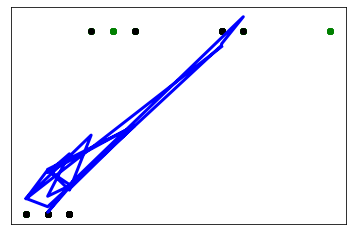

In [101]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# Plot outputs
plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.plot(X_test['n_experience'], y_test_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 4. Regresión Logística.

In [163]:
model = SGDClassifier(loss="log", eta0=1, learning_rate="constant", penalty=None)
model.fit(X_train, y_train)

SGDClassifier(eta0=1, learning_rate='constant', loss='log', penalty=None)

In [164]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [165]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [166]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.88      1.00      0.93         7

    accuracy                           0.95        22
   macro avg       0.94      0.97      0.95        22
weighted avg       0.96      0.95      0.96        22



In [167]:
model.coef_

array([[ 26.3083125 ,  -3.25954877, -52.95678379, 343.46949118]])

In [184]:
bound = X_test.dot(model.coef_.T)
print(bound)

               0
86    -66.074003
102  -471.134762
91    -92.150393
95   -114.967234
76    726.090787
52   -743.458255
59   -258.560318
8      36.139064
89    -72.593100
77    719.571689
46   -701.084121
94   -128.005430
113   124.719525
37   -363.654996
108  -399.424689
18   1425.480997
25   1445.038290
66   2167.855201
87    -56.295356
44   -707.603218
56   -284.389900
27   1409.183253


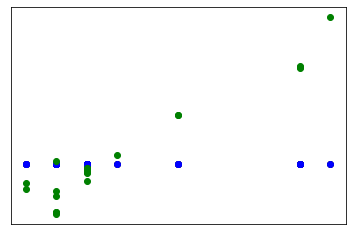

In [191]:
# Plot outputs
#plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.scatter(X_test['n_experience'], y_test_pred, color='blue')
plt.scatter(X_test['n_experience'],bound.T, color='green')


plt.xticks(())
plt.yticks(())

plt.show()

Param Grid aplicado sobre el modelo de Regresión Logística

In [135]:
param_grid = {
    'loss': ['log'],
    'penalty':['None', 'l2'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'eta0':[0.00000001, 0.000001, 0.0001, 0.01]
}

In [142]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
 #   print(params)
    model = SGDClassifier(**params, random_state=0)

In [137]:
from sklearn.model_selection import GridSearchCV

model = model = SGDClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y);

In [141]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("loss\penalty\alpha\learning_rate\eta0\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['loss']}\t{p['penalty']}\t{p['alpha']}\t{p['learning_rate']}\t{p['eta0']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

loss\penaltylpha\learning_rate\eta0	| mean	std	rank
log	None	0.0001	constant	1e-08	| 0.61	0.07	37
log	l2	0.0001	constant	1e-08	| 0.61	0.07	37
log	None	0.0001	invscaling	1e-08	| 0.47	0.07	67
log	l2	0.0001	invscaling	1e-08	| 0.47	0.07	67
log	None	0.0001	adaptive	1e-08	| 0.61	0.07	37
log	l2	0.0001	adaptive	1e-08	| 0.61	0.07	37
log	None	0.0001	constant	1e-06	| 0.61	0.07	37
log	l2	0.0001	constant	1e-06	| 0.61	0.07	37
log	None	0.0001	invscaling	1e-06	| 0.48	0.08	61
log	l2	0.0001	invscaling	1e-06	| 0.48	0.08	61
log	None	0.0001	adaptive	1e-06	| 0.61	0.07	37
log	l2	0.0001	adaptive	1e-06	| 0.61	0.07	37
log	None	0.0001	constant	0.0001	| 0.87	0.03	13
log	l2	0.0001	constant	0.0001	| 0.87	0.03	13
log	None	0.0001	invscaling	0.0001	| 0.62	0.08	31
log	l2	0.0001	invscaling	0.0001	| 0.62	0.08	31
log	None	0.0001	adaptive	0.0001	| 0.88	0.04	7
log	l2	0.0001	adaptive	0.0001	| 0.88	0.04	7
log	None	0.0001	constant	0.01	| 0.80	0.13	26
log	l2	0.0001	constant	0.01	| 0.80	0.13	26
log	None	0.0001	invscaling	0.01	|

Los mejores modelos tienen un accuracy promedio del 0.97 con una stdv de 0.2, Sin usar función de pérdida, y con una tasa adaptativa de la learnning rate.